In [1]:
import pandas as pd
import numpy as np


from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('german_credit_data.csv',index_col = 0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [4]:
df.fillna(0)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,0,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,0,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,0,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,0,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [5]:
categorial = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [6]:
df_w = df
for col in categorial:
    le = LabelEncoder()
    le.fit(df_w[col].unique())
    df_w[col] = le.transform(df_w[col])

df_w.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [7]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 58.6 KB


In [8]:
df_w.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,0.690000,1.904000,1.071000,1.105000,1.577000,3271.258000,20.903000,2.878000
std,11.375469,0.462725,0.653614,0.531264,1.580023,1.257638,2822.736876,12.058814,1.978138
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2319.500000,18.000000,3.000000
75%,42.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3972.250000,24.000000,5.000000
max,75.000000,1.000000,3.000000,2.000000,4.000000,3.000000,18424.000000,72.000000,7.000000


<AxesSubplot:>

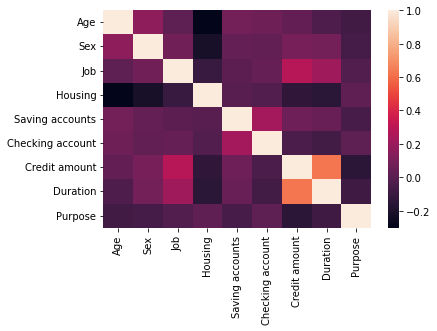

In [9]:
sns.heatmap(df_w.corr())

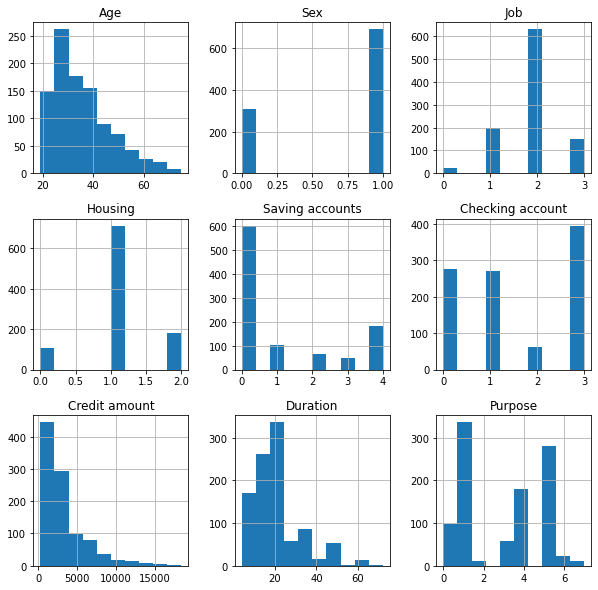

In [10]:
df_w.hist(figsize=(10, 10))

plt.show()

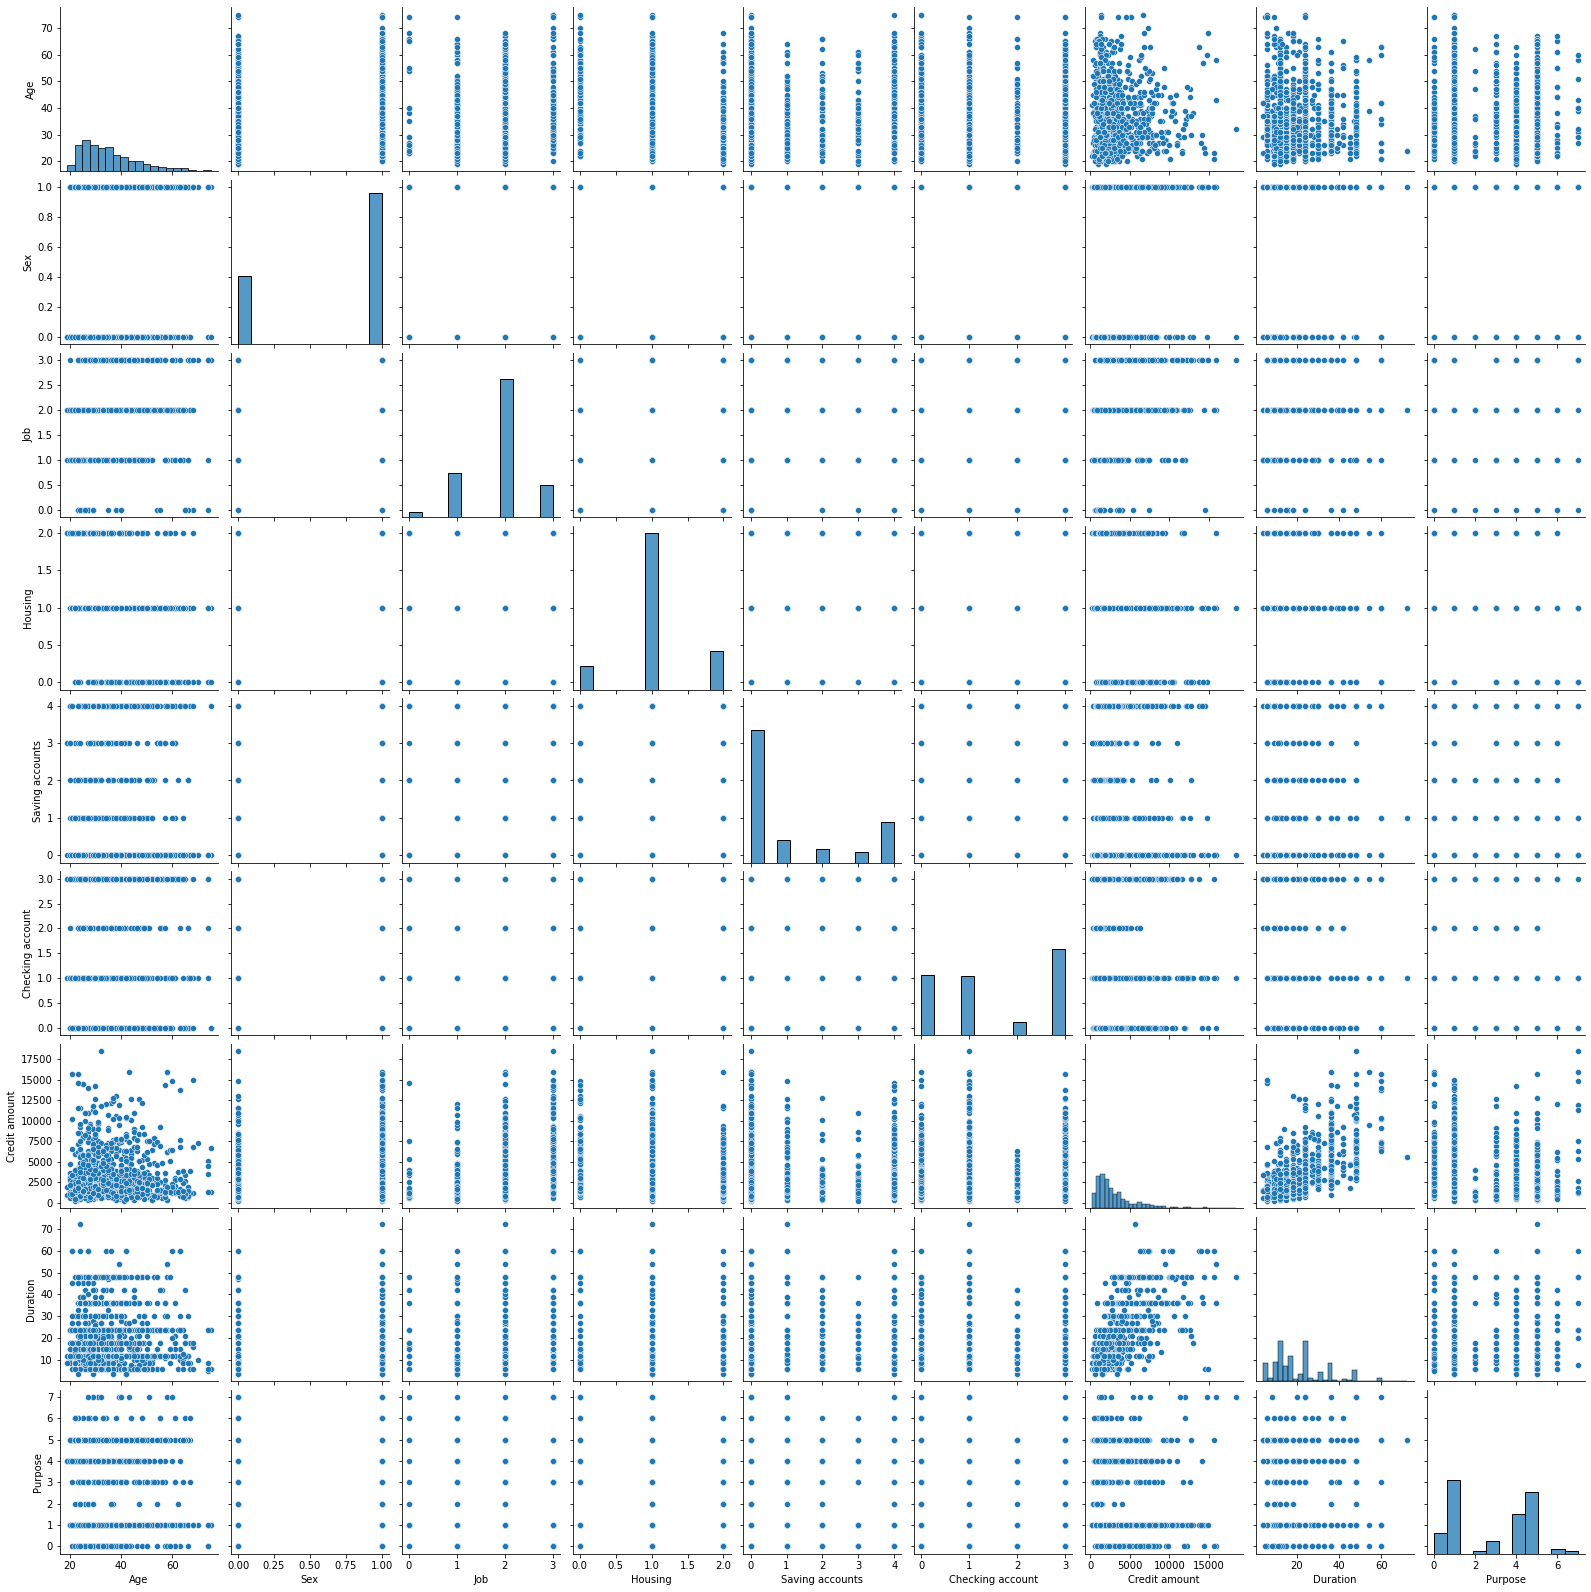

In [11]:
sns.pairplot(df_w)

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_w)

In [13]:
def silhouette(X,alg,min_k = 2,max_k = 13):
    plt.figure(figsize=(12, 4))
    silhouette = []
    clusters = []
    for i in tqdm(range(min_k,max_k)):
        agg = alg(n_clusters=i).fit(X)
        labels = agg.labels_
        score = silhouette_score(X, labels)
        silhouette.append(score)
        
        
    plt.plot(range(min_k,max_k), silhouette, marker='o');
    

In [14]:
def elbow(X,alg,min_k = 2,max_k = 13):
    

    inertia = []
    for k in tqdm(range(min_k, max_k)):

        kmeans = alg(n_clusters=k).fit(X)

        inertia.append(np.sqrt(kmeans.inertia_))
        
    d = {}
    for k in range(2, max_k-2):
        i = k - 1
        d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])
    plt.figure(figsize=(12, 4))
    plt.plot(range(min_k, max_k-2), [x for x in d.values()], marker='s')

    plt.title('The Elbow Method using Inertia')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Comparative decrease in inertia')

    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 20.22it/s]


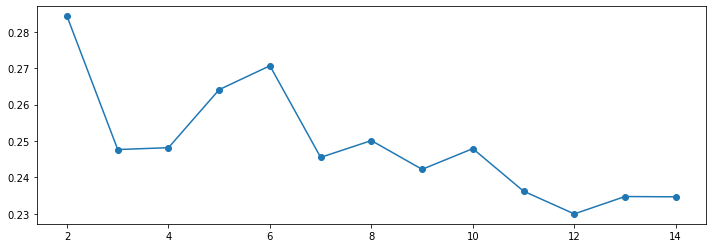

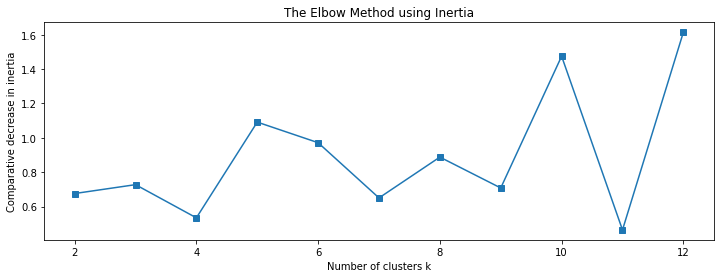

In [15]:
silhouette(X_scaled,KMeans,2,15)
elbow(X_scaled,KMeans,2,15)
#6 кластреов лучший результат

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 22.04it/s]


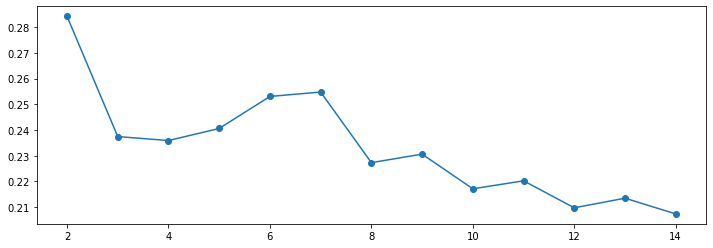

In [16]:
silhouette(X_scaled,AgglomerativeClustering,2,15)

#6 - 7  кластреов лучший результат

In [17]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i,min_samples=3 ).fit(X_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 17.65it/s]


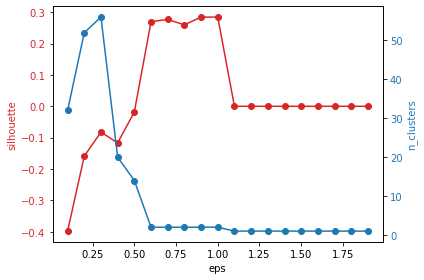

In [18]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 2 класса лучше всего  eps от 0.6 -  1

In [19]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
def PCA_g(lbl):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(
        x=X_reduced[:, 0], 
        y=X_reduced[:, 1], 
         hue=lbl, 
        palette="CMRmap", 
        legend='full'

    )
    plt.setp(ax, xticks=[], yticks=[])
    #plt.title("MNIST data embedded into two dimensions by PCA", fontsize=18)
    plt.show()

In [20]:
%%time
from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
def TSNE_g(lbl):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(
        x=tsne_transformed[:, 0], 
        y=tsne_transformed[:, 1], 
         hue=lbl, 
        palette="CMRmap", 
        legend='full'

    )
    plt.setp(ax, xticks=[], yticks=[])
    #plt.title("MNIST data embedded into two dimensions by PCA", fontsize=18)
    plt.show()

CPU times: total: 10.9 s
Wall time: 3.33 s


In [21]:
%%time
import umap
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)
def UMAP_g(lbl):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(
        x=embedding[:, 0], 
        y=embedding[:, 1], 
        hue=lbl, 
        palette="CMRmap", 
        legend='full'
    )
    plt.setp(ax, xticks=[], yticks=[])
    #plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

    plt.show()

CPU times: total: 13.5 s
Wall time: 13.2 s


# KMEANS


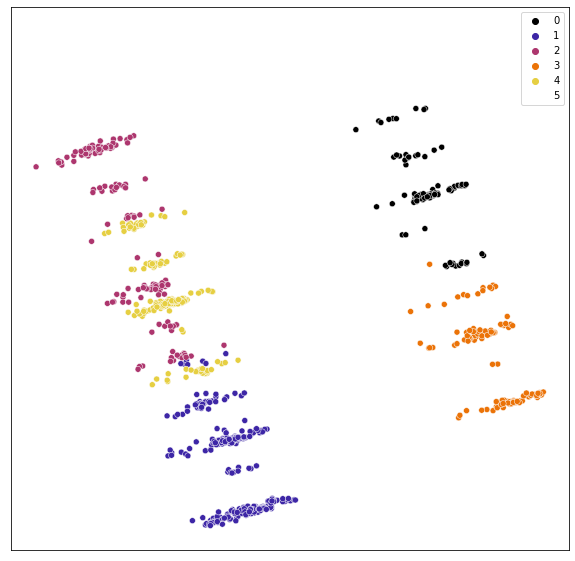

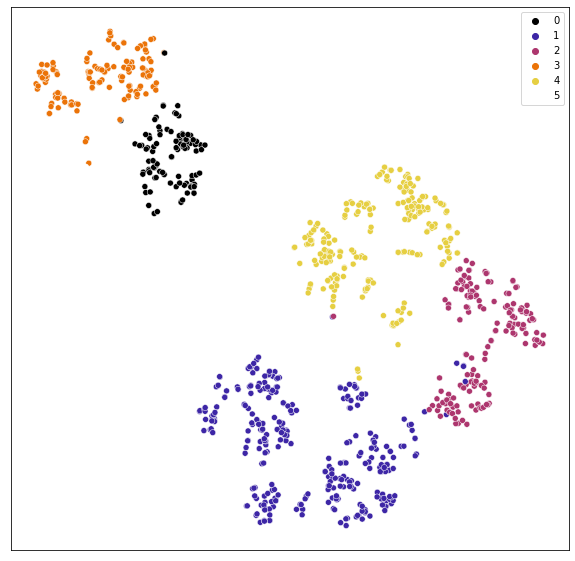

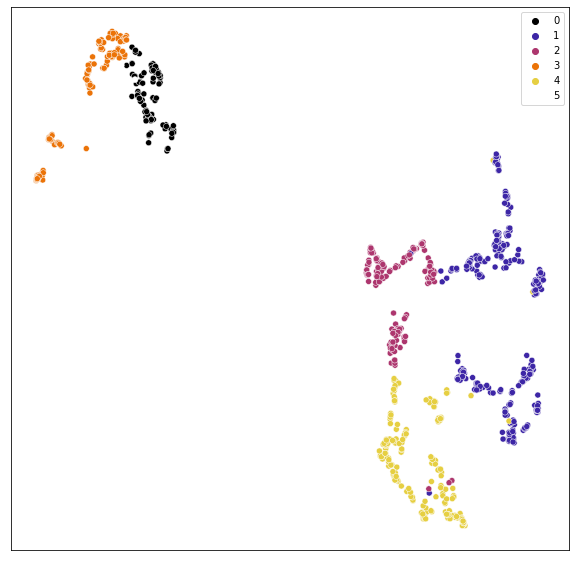

In [22]:
lbl = KMeans(n_clusters=6).fit(X_scaled).labels_
PCA_g(lbl)
TSNE_g(lbl)
UMAP_g(lbl)

# AgglomerativeClustering


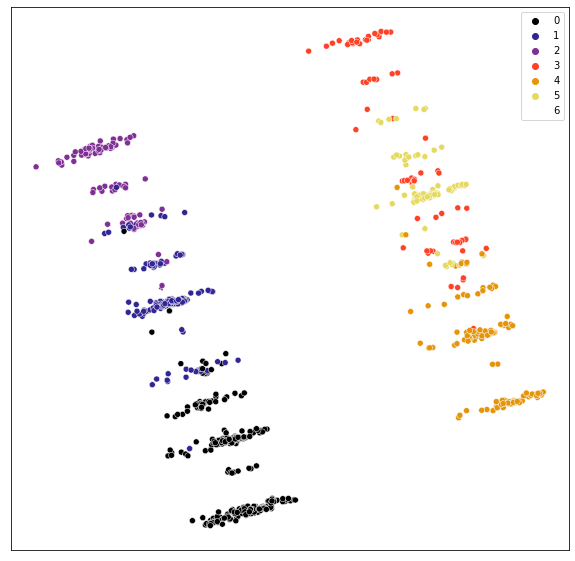

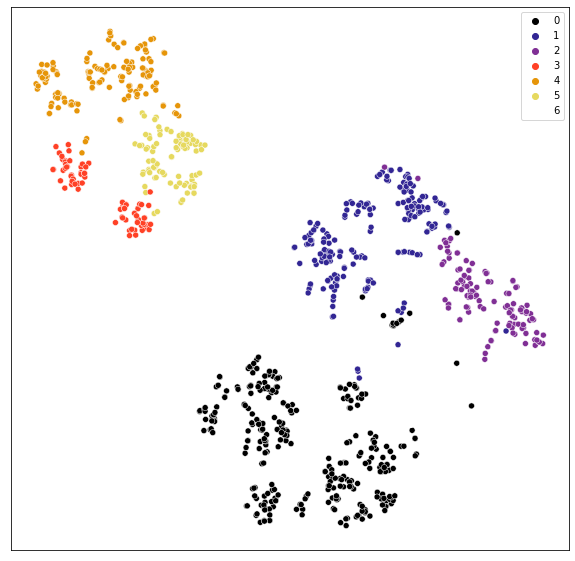

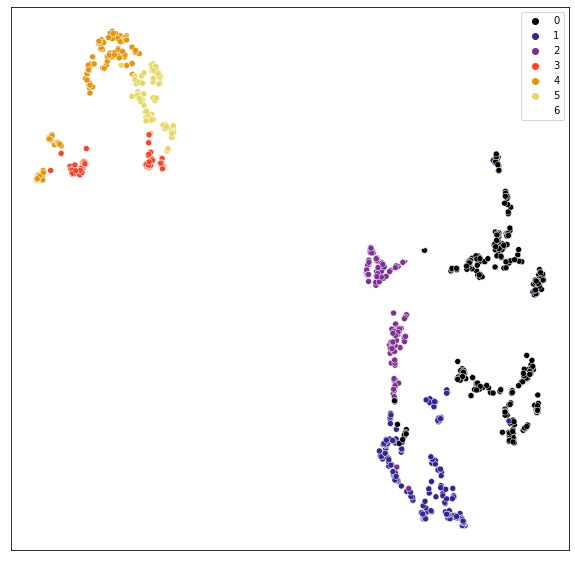

In [23]:
lbl = AgglomerativeClustering(n_clusters=7).fit(X_scaled).labels_
PCA_g(lbl)
TSNE_g(lbl)
UMAP_g(lbl)

# DBSCAN


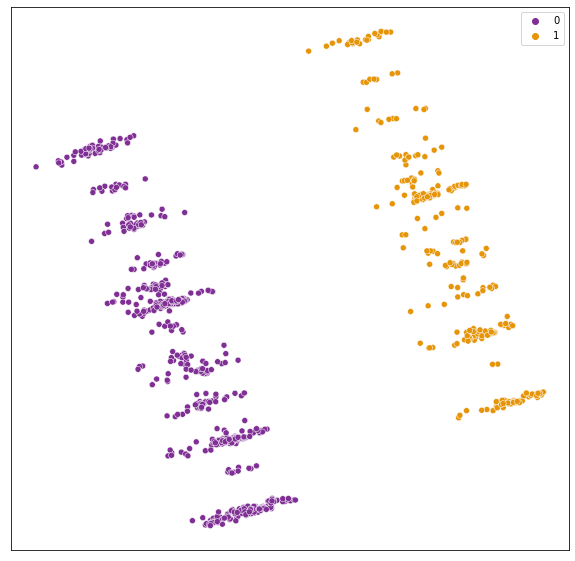

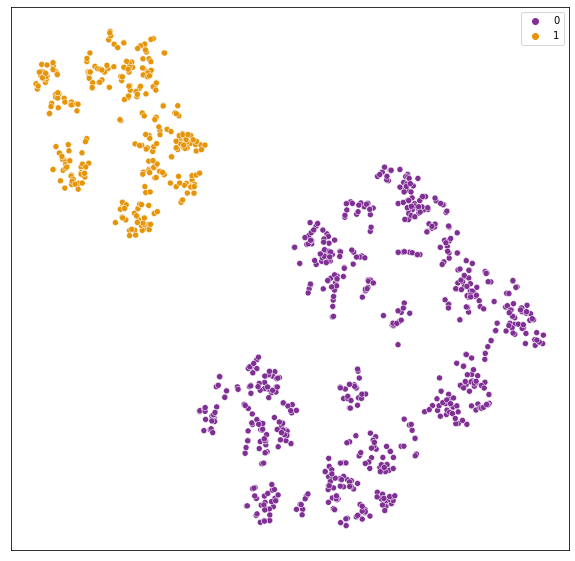

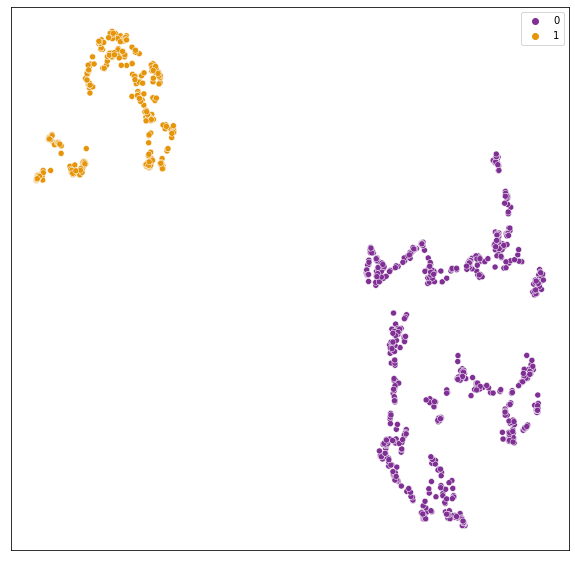

In [24]:
lbl = DBSCAN(eps=1,min_samples=5 ).fit(X_scaled).labels_
PCA_g(lbl)
TSNE_g(lbl)
UMAP_g(lbl)

In [25]:
df_w['KMEANS'] = KMeans(n_clusters=6).fit(X_scaled).labels_
df_w['Aggl'] = AgglomerativeClustering(n_clusters=7).fit(X_scaled).labels_
df_w['DBSCAN'] = DBSCAN(eps=1,min_samples=5 ).fit(X_scaled).labels_
df_w

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,KMEANS,Aggl,DBSCAN
0,67,1,2,1,4,0,1169,6,5,2,6,0
1,22,0,2,1,0,1,5951,48,5,3,4,1
2,49,1,1,1,0,3,2096,12,3,5,1,0
3,45,1,2,0,0,0,7882,42,4,0,0,0
4,53,1,2,0,0,0,4870,24,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,4,4,5,1
996,40,1,3,1,0,0,3857,30,1,0,0,0
997,38,1,2,1,0,3,804,12,5,5,1,0
998,23,1,2,0,0,0,1845,45,5,0,0,0


# KMEANS


In [26]:
df.drop(['Aggl','DBSCAN'],axis = 1).groupby('KMEANS').mean().T.round(2)

KMEANS,0,1,2,3,4,5
Age,35.66,34.47,38.99,32.04,32.63,36.69
Sex,1.00,0.00,1.00,0.00,0.00,1.00
Job,1.92,1.81,1.95,1.84,1.85,1.95
Housing,1.02,1.37,0.92,1.24,1.17,1.01
Saving accounts,0.24,3.60,3.79,0.14,0.35,0.41
Checking account,0.46,1.70,2.11,0.47,2.83,2.86
Credit amount,3562.30,2790.33,4009.55,3121.95,2612.19,2849.05
Duration,22.39,19.51,23.02,20.76,17.60,19.24
Purpose,2.76,2.79,2.62,3.13,3.17,2.98


In [27]:
df.drop(['Aggl','DBSCAN'],axis = 1).groupby('KMEANS').median().T.round(2)

KMEANS,0,1,2,3,4,5
Age,33.0,30.0,37.0,27.0,28.0,35.0
Sex,1.0,0.0,1.0,0.0,0.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0,1.0,1.0
Saving accounts,0.0,4.0,4.0,0.0,0.0,0.0
Checking account,0.0,1.0,3.0,0.0,3.0,3.0
Credit amount,2522.0,1924.0,2899.0,2082.5,1881.0,2125.0
Duration,18.0,18.0,21.0,18.0,15.0,18.0
Purpose,3.0,3.0,1.0,4.0,4.0,4.0


# AgglomerativeClustering


In [28]:
df.drop(['KMEANS','DBSCAN'],axis = 1).groupby('Aggl').median().T.round(2)

Aggl,0,1,2,3,4,5,6
Age,32.0,35.0,38.0,30.5,28.0,28.0,36.0
Sex,1.0,1.0,1.0,0.0,0.0,0.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Saving accounts,0.0,0.0,4.0,4.0,0.0,0.0,4.0
Checking account,0.0,3.0,3.0,1.5,1.0,3.0,1.0
Credit amount,2611.0,2080.0,2978.0,1946.0,2039.0,1864.0,2537.0
Duration,20.0,18.0,21.0,18.0,18.0,15.0,18.0
Purpose,3.0,3.0,3.0,3.0,4.0,4.0,3.0


# DBSCAN


In [29]:
df.drop(['Aggl','KMEANS'],axis = 1).groupby('DBSCAN').median().T.round(2)

DBSCAN,0,1
Age,35.0,29.0
Sex,1.0,0.0
Job,2.0,2.0
Housing,1.0,1.0
Saving accounts,0.0,0.0
Checking account,1.0,1.0
Credit amount,2443.5,1959.0
Duration,18.0,18.0
Purpose,3.0,4.0


# KMEANS


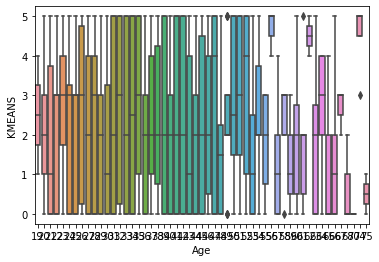

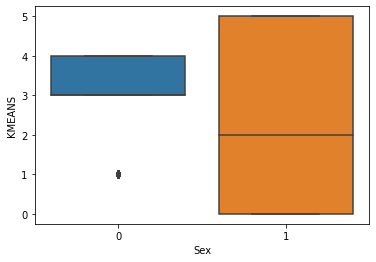

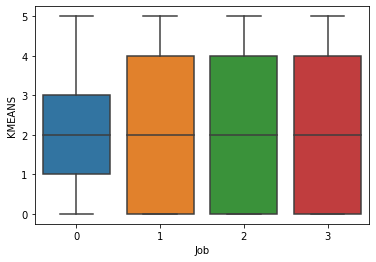

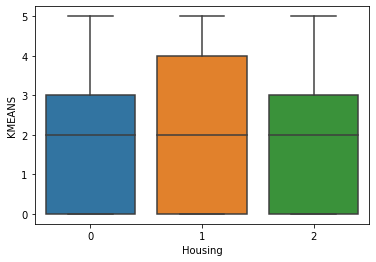

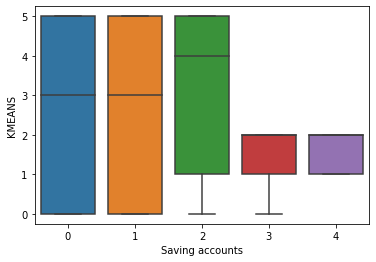

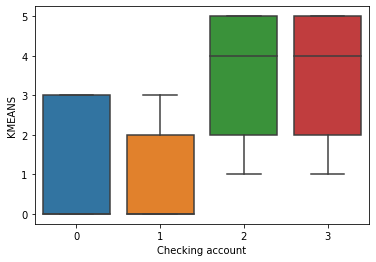

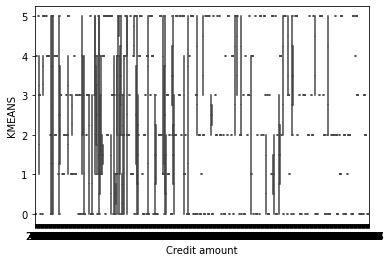

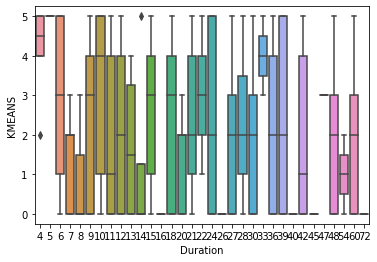

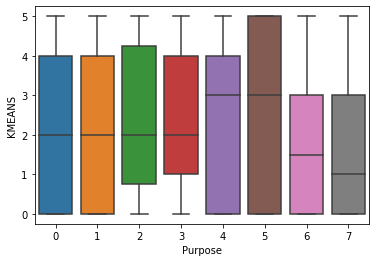

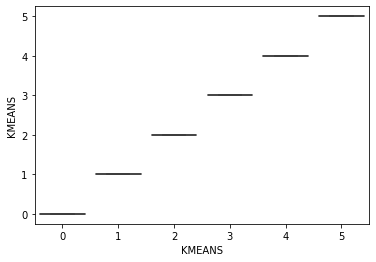

In [30]:
for col in df.drop(['Aggl','DBSCAN'], axis = 1).columns:
    sns.boxplot(data=df.drop(['Aggl','DBSCAN'],axis = 1), x = col, y = 'KMEANS')
    plt.show()

# AgglomerativeClustering


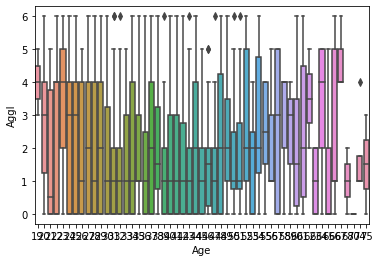

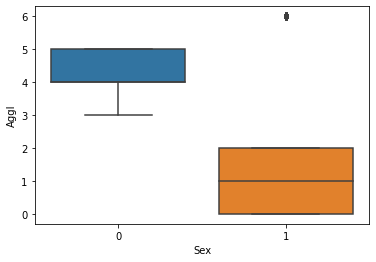

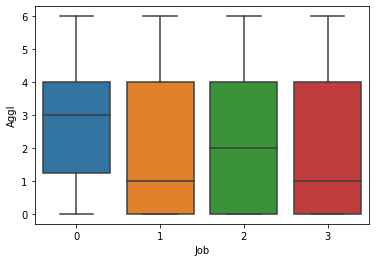

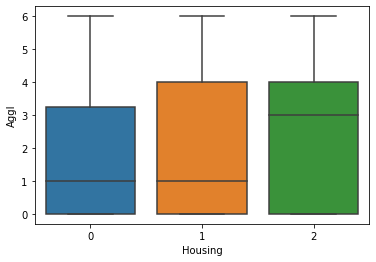

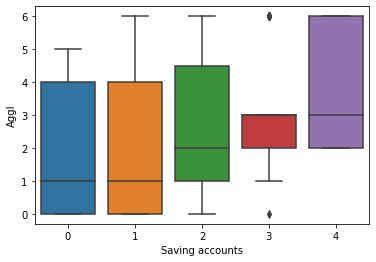

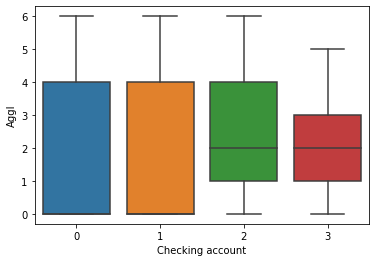

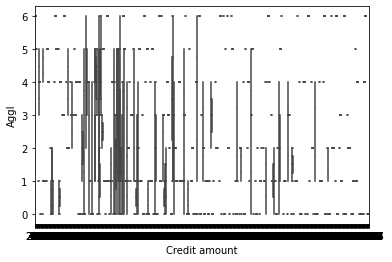

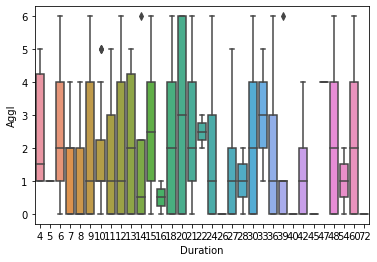

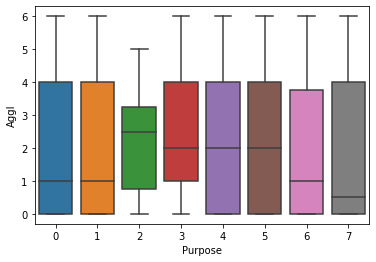

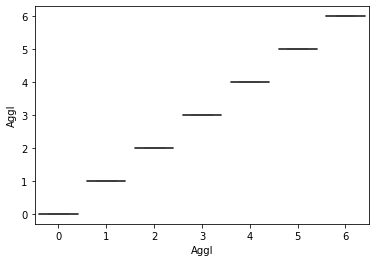

In [31]:
for col in df.drop(['KMEANS','DBSCAN'], axis = 1).columns:
    sns.boxplot(data=df.drop(['KMEANS','DBSCAN'],axis = 1), x = col, y = 'Aggl')
    plt.show()

# DBSCAN


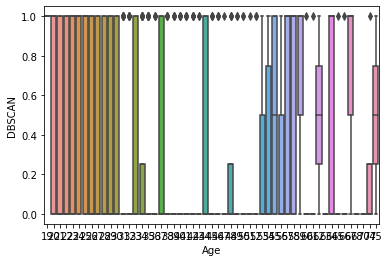

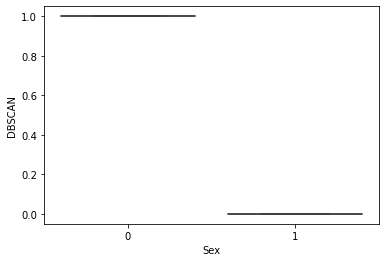

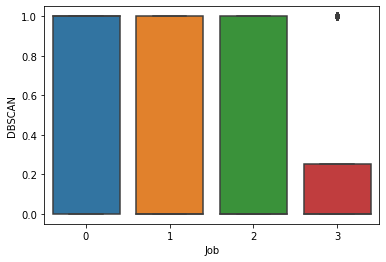

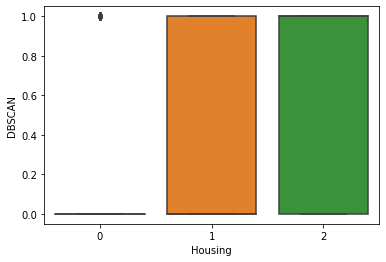

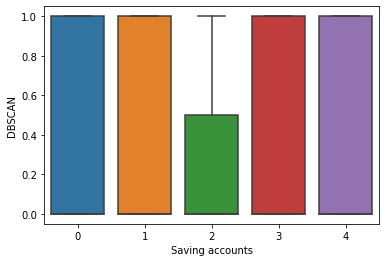

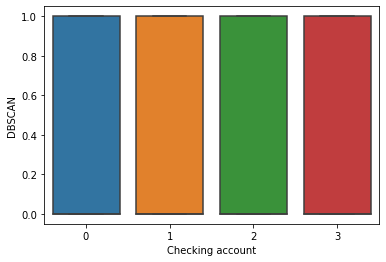

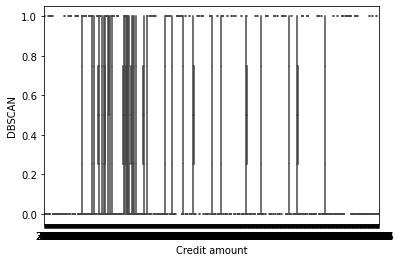

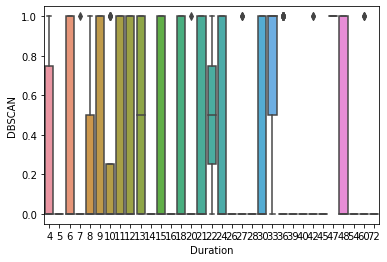

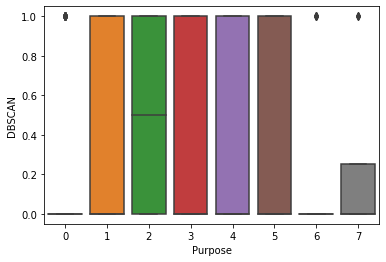

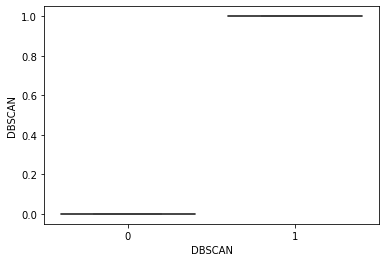

In [32]:
for col in df.drop(['Aggl','KMEANS'], axis = 1).columns:
    sns.boxplot(data=df.drop(['Aggl','KMEANS'],axis = 1), x = col, y = 'DBSCAN')
    plt.show()